Importing the libraries needed

In [1]:
# importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model
import sklearn.metrics

Reading the file of air quality

#To read excel file
pip install xlrd

# Reading the file as excel file

In [2]:
# Reading the excel file and finding the shape(rows,columns)
df = pd.read_excel("AirQuality_data.xlsx") 
df.shape


(9357, 9)

In [3]:
# Display the column name 
df.columns

Index(['Date', 'Time', 'CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NO2(GT)', 'T', 'RH',
       'AH'],
      dtype='object')

In [4]:
# Display the Air Quality into table form
df

,Date,Time,CO(GT),NMHC(GT),C6H6(GT),NO2(GT),T,RH,AH
0,2004-03-10,18:00:00,2.6,150,11.881723,113.0,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,112,9.397165,92.0,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,88,8.997817,114.0,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,80,9.228796,122.0,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,51,6.518224,116.0,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,-200,13.529605,189.8,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,-200,11.355157,179.2,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,-200,12.374538,174.7,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,-200,9.547187,155.7,28.325,13.550000,0.513866


1. Remove rows containing missing values from the entire dataset and plot the distributions of all 4 compounds in a 2x2 (2 rows, 2 columns)subplot. Report the mean, standard deviation, and median of the dataset as labels on individual plots. 
Also, depict the mean and median as different coloured vertical lines on the individual plots. 

1.1 Remove rows containing missing values from the entire dataset

In [5]:
# Keep the columns without the missing values (-200)

for column in df:
    df = df[df[column]!=-200]
 
df

,Date,Time,CO(GT),NMHC(GT),C6H6(GT),NO2(GT),T,RH,AH
0,2004-03-10,18:00:00,2.6,150,11.881723,113.0,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,112,9.397165,92.0,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,88,8.997817,114.0,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,80,9.228796,122.0,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,51,6.518224,116.0,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...
1226,2004-04-30,20:00:00,4.4,501,19.494597,133.0,19.075,61.075001,1.334500
1227,2004-04-30,21:00:00,3.1,234,15.100351,110.0,18.200,65.350002,1.352888
1228,2004-04-30,22:00:00,3.0,212,14.594739,102.0,18.075,66.100000,1.357869
1229,2004-04-30,23:00:00,3.1,275,13.697100,108.0,17.700,66.875000,1.342218


In [6]:
# Get row values of column through index
df[df.columns[2]]

0       2.6
1       2.0
2       2.2
3       2.2
4       1.6
       ... 
1226    4.4
1227    3.1
1228    3.0
1229    3.1
1230    3.5
Name: CO(GT), Length: 827, dtype: float64

1.2 plot the distributions of all 4 compounds in a 2x2 (2 rows, 2 columns) subplot

1.2Report the mean, standard deviation, and median of the dataset as labels on individual plots. 
Also, depict the mean and median as different coloured vertical lines on the individual plots.

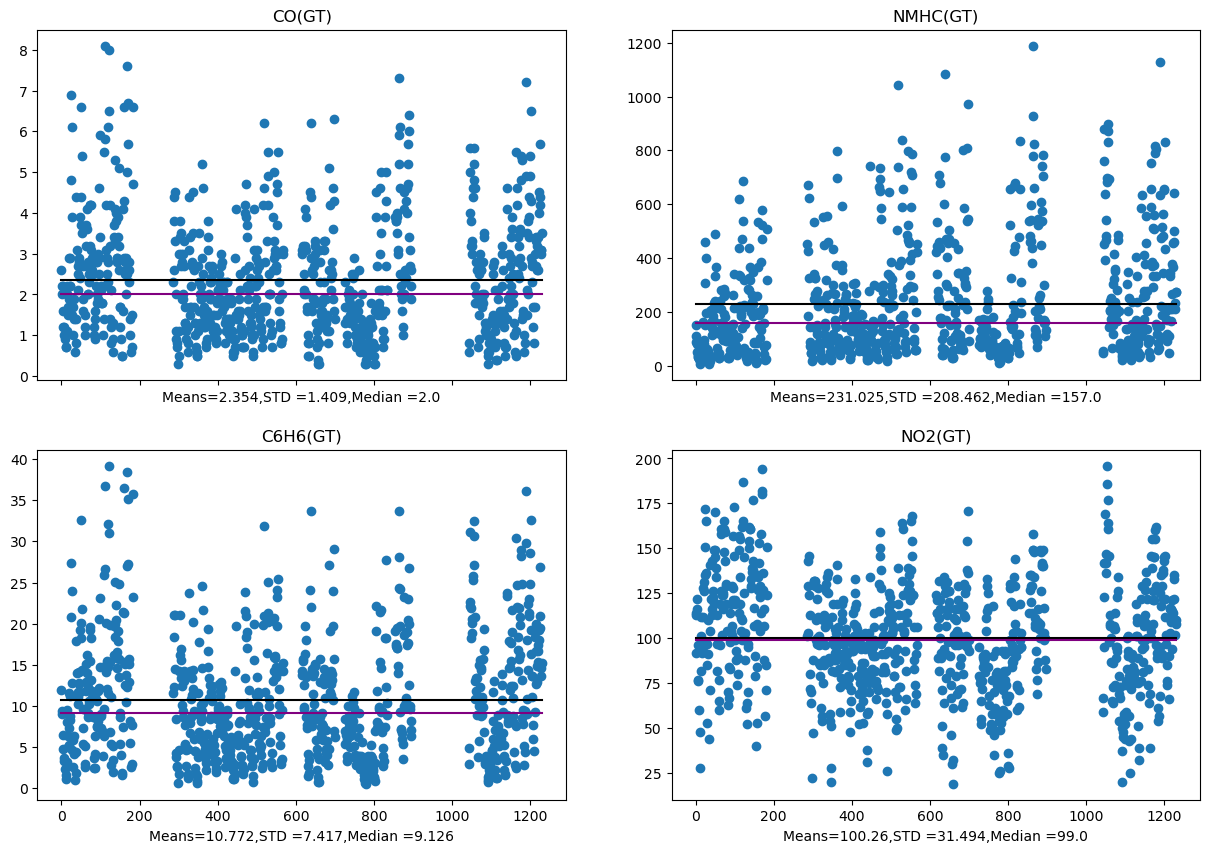

In [7]:
# Create subplot for 4 components
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,10),sharex= True)

x = df.index

j=2
# Extract rows and column through for loop
for row in ax:
    for col in row:
        # Scatter plot of index with concentration
        col.scatter(x, df[df.columns[j]])
        col.set_title(f'{df.columns[j]}')
        #Calculating mean
        mean1 = round(df[df.columns[j]].mean(),3)
        df['mean1'] = mean1
        # Calculate std
        std1 =  round(df[df.columns[j]].std(),3)
        #Calculate Median
        med1 = round(df[df.columns[j]].median(),3)
        df['med1'] = med1
        col.set_xlabel(f'Means={mean1},STD ={std1},Median ={med1}')
        # to plot Horizontal line of Mean and Median
        col.plot(x,df['mean1'],color ='black')
        col.plot(x,df['med1'],color='purple')
        df.drop(columns=['mean1','med1'])
        j+=1

plt.show()

2.Split the dataset in 8 different windows of 3 hours each (00:00-3:00;3:00-6:00 and so on) and plot the mean concentrations of each compound in these intervals over all days as a bar graph (time windows on x axis).
Report the time windows having the highest mean concentrations for each compound.

Method:
    2.1.Converting time to integer data
    2.2.Apply cut function to cut time data into 3 hours interval
    2.3.Use groupby function and group 3 hours interval and find their mean
    2.4.Plot the concentration vs time interval
    2.5 Find Max conc and time interval

2.1.Converting time to integer data

In [8]:
#Checking the data type of time
type(df['Time'][0])

datetime.time

In [9]:
#Converting Datetime.time to integer to perform groupby function  
# Convert the time to string by strftime and then to int by applying function to each row

df['newtime']=df['Time'].apply(lambda x: int(x.strftime("%H%M%S")))

df

,Date,Time,CO(GT),NMHC(GT),C6H6(GT),NO2(GT),T,RH,AH,mean1,med1,newtime
0,2004-03-10,18:00:00,2.6,150,11.881723,113.0,13.600,48.875001,0.757754,100.26,99.0,180000
1,2004-03-10,19:00:00,2.0,112,9.397165,92.0,13.300,47.700000,0.725487,100.26,99.0,190000
2,2004-03-10,20:00:00,2.2,88,8.997817,114.0,11.900,53.975000,0.750239,100.26,99.0,200000
3,2004-03-10,21:00:00,2.2,80,9.228796,122.0,11.000,60.000000,0.786713,100.26,99.0,210000
4,2004-03-10,22:00:00,1.6,51,6.518224,116.0,11.150,59.575001,0.788794,100.26,99.0,220000
...,...,...,...,...,...,...,...,...,...,...,...,...
1226,2004-04-30,20:00:00,4.4,501,19.494597,133.0,19.075,61.075001,1.334500,100.26,99.0,200000
1227,2004-04-30,21:00:00,3.1,234,15.100351,110.0,18.200,65.350002,1.352888,100.26,99.0,210000
1228,2004-04-30,22:00:00,3.0,212,14.594739,102.0,18.075,66.100000,1.357869,100.26,99.0,220000
1229,2004-04-30,23:00:00,3.1,275,13.697100,108.0,17.700,66.875000,1.342218,100.26,99.0,230000


In [10]:
#Finding unique value in new time frame
df['newtime'].unique()

array([180000, 190000, 200000, 210000, 220000, 230000,      0,  10000,
        20000,  50000,  60000,  70000,  80000,  90000, 100000, 110000,
       120000, 130000, 140000, 150000, 160000, 170000,  40000])

2.1 Split the dataset in 8 different windows of 3 hours each (00:00-3:00;3:00-6:00 and so on) 

    2.2.Apply cut function to cut time data into 3 hours interval


In [11]:
# Creating specific interval in variable bin
# bin numeric values into discrete interval

bins = pd.IntervalIndex.from_tuples([(0, 30000), (30000, 60000), (60000, 90000),(90000,120000),(120000,150000),(150000,180000),(180000,210000),(210000,235959)])
df['time_interval'] = pd.cut(df['newtime'], bins)
df.head()

,Date,Time,CO(GT),NMHC(GT),C6H6(GT),NO2(GT),T,RH,AH,mean1,med1,newtime,time_interval
0,2004-03-10,18:00:00,2.6,150,11.881723,113.0,13.60,48.875001,0.757754,100.26,99.0,180000,"(150000, 180000]"
1,2004-03-10,19:00:00,2.0,112,9.397165,92.0,13.30,47.700000,0.725487,100.26,99.0,190000,"(180000, 210000]"
2,2004-03-10,20:00:00,2.2,88,8.997817,114.0,11.90,53.975000,0.750239,100.26,99.0,200000,"(180000, 210000]"
3,2004-03-10,21:00:00,2.2,80,9.228796,122.0,11.00,60.000000,0.786713,100.26,99.0,210000,"(180000, 210000]"
4,2004-03-10,22:00:00,1.6,51,6.518224,116.0,11.15,59.575001,0.788794,100.26,99.0,220000,"(210000, 235959]"


    2.3.Use groupby function and group 3 hours interval and find their mean


In [12]:
# remove Date and Time as we can not perform groupby on that datatype
df2 = df.drop(columns=['Date', 'Time'])
df2

,CO(GT),NMHC(GT),C6H6(GT),NO2(GT),T,RH,AH,mean1,med1,newtime,time_interval
0,2.6,150,11.881723,113.0,13.600,48.875001,0.757754,100.26,99.0,180000,"(150000.0, 180000.0]"
1,2.0,112,9.397165,92.0,13.300,47.700000,0.725487,100.26,99.0,190000,"(180000.0, 210000.0]"
2,2.2,88,8.997817,114.0,11.900,53.975000,0.750239,100.26,99.0,200000,"(180000.0, 210000.0]"
3,2.2,80,9.228796,122.0,11.000,60.000000,0.786713,100.26,99.0,210000,"(180000.0, 210000.0]"
4,1.6,51,6.518224,116.0,11.150,59.575001,0.788794,100.26,99.0,220000,"(210000.0, 235959.0]"
...,...,...,...,...,...,...,...,...,...,...,...
1226,4.4,501,19.494597,133.0,19.075,61.075001,1.334500,100.26,99.0,200000,"(180000.0, 210000.0]"
1227,3.1,234,15.100351,110.0,18.200,65.350002,1.352888,100.26,99.0,210000,"(180000.0, 210000.0]"
1228,3.0,212,14.594739,102.0,18.075,66.100000,1.357869,100.26,99.0,220000,"(210000.0, 235959.0]"
1229,3.1,275,13.697100,108.0,17.700,66.875000,1.342218,100.26,99.0,230000,"(210000.0, 235959.0]"


In [13]:
# new DataFrame group by time interval with their mean
df3 =df2.groupby(['time_interval']).mean().reset_index()
df3

,time_interval,CO(GT),NMHC(GT),C6H6(GT),NO2(GT),T,RH,AH,mean1,med1,newtime
0,"(0, 30000]",1.170270,68.067568,4.405798,71.094595,12.650450,58.041329,0.848097,100.26,99.0,15000.00000
1,"(30000, 60000]",0.839080,52.620690,3.279878,58.770115,11.494923,60.820307,0.820305,100.26,99.0,52758.62069
2,"(60000, 90000]",3.077477,348.738739,14.912703,101.972973,12.707432,57.667267,0.840716,100.26,99.0,80000.00000
3,"(90000, 120000]",2.473874,245.171171,11.480436,109.801802,18.076577,41.237613,0.818884,100.26,99.0,110000.00000
4,"(120000, 150000]",2.327619,237.114286,11.386205,104.723810,19.725159,36.796190,0.795030,100.26,99.0,139809.52381
5,"(150000, 180000]",2.879279,309.162162,13.783476,115.315315,19.104880,38.665015,0.808326,100.26,99.0,170180.18018
6,"(180000, 210000]",3.535965,369.885965,15.726514,126.745614,15.768494,48.648830,0.860023,100.26,99.0,200000.00000
7,"(210000, 235959]",1.871053,135.592105,7.926480,98.065789,13.866996,54.672040,0.863664,100.26,99.0,225000.00000


2.4.Plot the concentration vs time interval

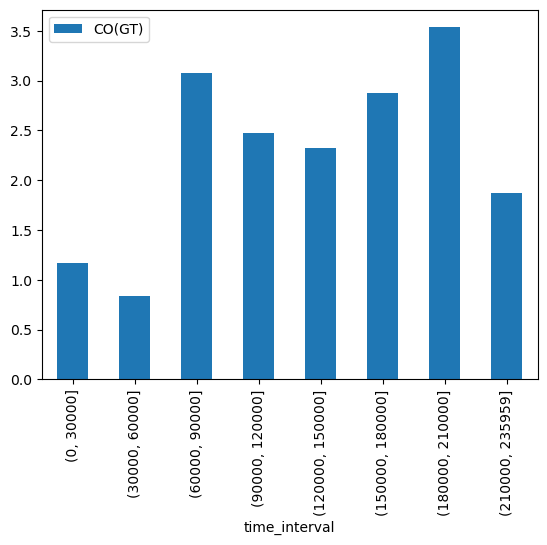

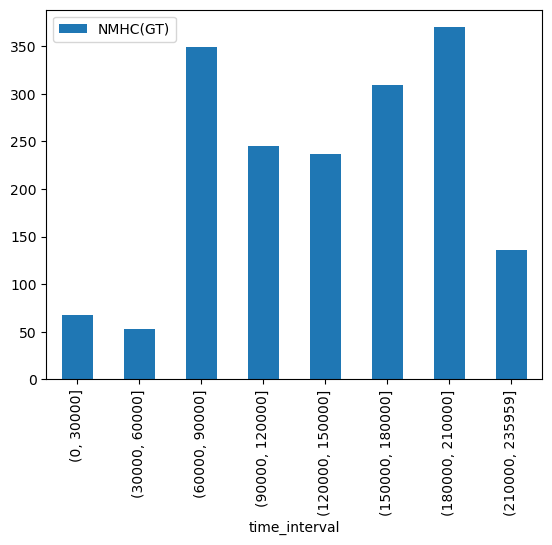

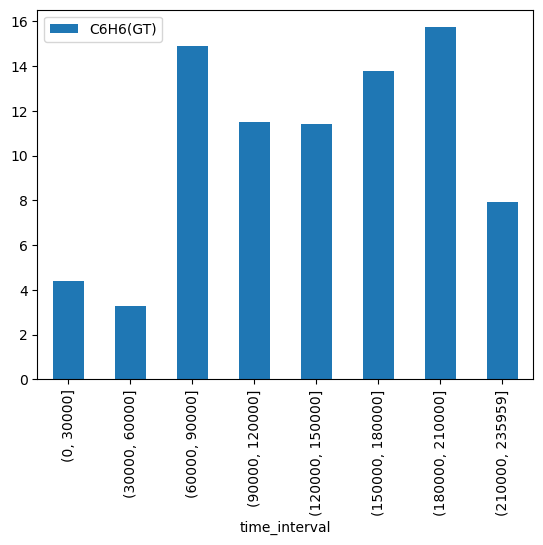

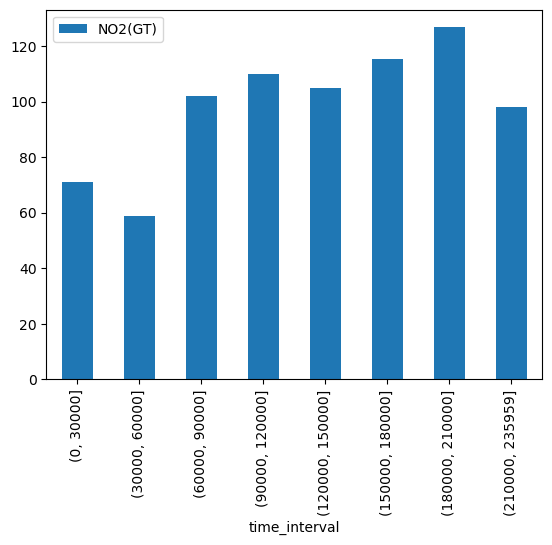

In [14]:
# Printing Bar graph of each compound in each time interval
for j in range(1,5):
    col_name = df3.columns[j]
    df3.plot(kind='bar', x='time_interval', y=col_name)

<Axes: xlabel='time_interval'>

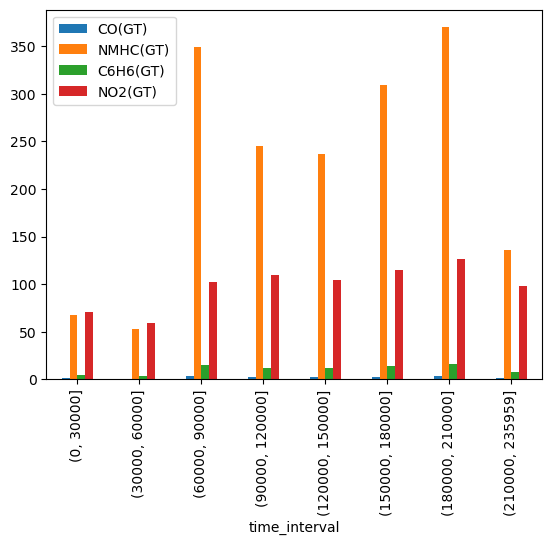

In [15]:
#plotting All compound columns in one bar plot
df3.plot(x='time_interval', y=['CO(GT)','NMHC(GT)','C6H6(GT)','NO2(GT)'], kind="bar") 


2.5 Find Max conc and time interval

In [16]:
# Finding out the maximum concentration and their time interval
for j in range(1,5):
    col_name= df3.columns[j]
    max1 = df3[col_name].max()
    interval = df3['time_interval'][df3[col_name].idxmax()]
    print(f'The maximum concentration of {col_name} is {max1} in time interval {interval}')
    

The maximum concentration of CO(GT) is 3.535964912280702 in time interval (180000, 210000]
The maximum concentration of NMHC(GT) is 369.8859649122807 in time interval (180000, 210000]
The maximum concentration of C6H6(GT) is 15.726513700314767 in time interval (180000, 210000]
The maximum concentration of NO2(GT) is 126.74561403508773 in time interval (180000, 210000]


3.Plot sample mean and standard deviation with increasing sample size on x axis and mean/std on y axis.
Do this part with NO2 and NMHC.
Also, add a horizontal line representing the population mean and standard deviation on the corresponding plots. (10 points)

Method:
    3.1 Create sample size from 2 to sample size of dataframe
    3.2 calculate mean ,std and mean/std
    3.3 Plot the graph and horizontal line

Component:NO2(GT) and NMHC(GT)

 3.1 Create sample size from 2 to sample size of dataframe

In [17]:
# Create dataframe for different sample size
df_sample= pd.DataFrame()


In [18]:
#Create list of sample size,mean,std,ratio
Sample_size =[]
#For NO2(GT)
mean1=[]
std1 =[]

#For NMHC(GT)
mean2=[]
std2 =[]


3.2 calculate mean ,std and mean/std

In [19]:
# For sample size from 2 to length od dataframe finding mean,std and mean/std
for i in range(2,len(df)):
    #Creating sample for NO2(GT)
    random_sample1 = df['NO2(GT)'].sample(n=i,random_state = 800)
    Sample_size.append(i)
    mean1.append(random_sample1.mean())
    std1.append(random_sample1.std())
    
    
     #Creating sample for NMHC(GT)
    random_sample2 = df['NMHC(GT)'].sample(n=i,random_state = 800)
    mean2.append(random_sample2.mean())
    std2.append(random_sample2.std())
    



In [20]:
# Assign computed list into data frame
df_sample["Sample_size"]= Sample_size
#for NO2(GT)
df_sample["Mean1"]=mean1
df_sample["std1"]=std1

df_sample["Pop_mean1"] = df_sample["Mean1"].mean()
df_sample["Pop_std1"] = df_sample["std1"].mean()
#For NMHC(GT)
df_sample["Mean2"]=mean2
df_sample["std2"]=std2

df_sample["Pop_mean2"] = df_sample["Mean2"].mean()
df_sample["Pop_std2"] = df_sample["std2"].mean()

In [21]:
df_sample

,Sample_size,Mean1,std1,Pop_mean1,Pop_std1,Mean2,std2,Pop_mean2,Pop_std2
0,2,102.000000,59.396970,101.423389,30.487526,373.000000,434.163564,239.762996,213.160486
1,3,101.000000,42.035699,101.423389,30.487526,300.333333,331.798634,239.762996,213.160486
2,4,96.750000,35.358874,101.423389,30.487526,249.000000,289.713652,239.762996,213.160486
3,5,94.600000,30.996774,101.423389,30.487526,214.000000,262.822183,239.762996,213.160486
4,6,85.500000,35.573867,101.423389,30.487526,180.166667,249.256026,239.762996,213.160486
...,...,...,...,...,...,...,...,...,...
820,822,100.144769,31.460080,101.423389,30.487526,230.594891,208.032920,239.762996,213.160486
821,823,100.157959,31.443215,101.423389,30.487526,230.515188,207.918913,239.762996,213.160486
822,824,100.240291,31.512855,101.423389,30.487526,231.190534,208.694912,239.762996,213.160486
823,825,100.259394,31.498507,101.423389,30.487526,231.166061,208.569423,239.762996,213.160486


  3.3 Plot the graph and horizontal line

IndexError: index 9 is out of bounds for axis 0 with size 9

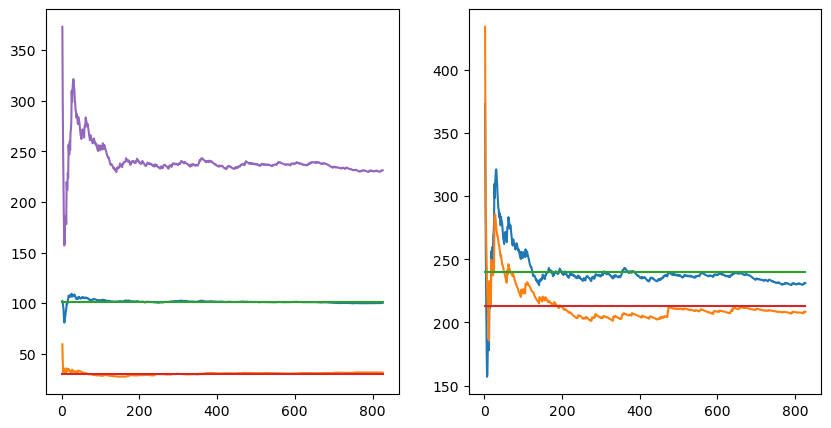

In [23]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharex=True)
for j in range(1,6):
    #For NO2(GT)
    ax[0].plot(df_sample['Sample_size'],df_sample[df_sample.columns[j]],label=f'{df_sample.columns[j]}')
    #for NMHC(GT)
    ax[1].plot(df_sample['Sample_size'],df_sample[df_sample.columns[j+4]],label=f'{df_sample.columns[j+4]}')
 
#Adding labels
ax[0].set_xlabel('Sample size', fontweight ='bold', fontsize = 10)
ax[0].set_ylabel('Mean,std ', fontweight ='bold', fontsize = 10)
ax[0].set_title('NO2(GT)')
plt.legend()

#Adding labels
ax[1].set_xlabel('Sample size', fontweight ='bold', fontsize = 10)
ax[1].set_ylabel('Mean,std', fontweight ='bold', fontsize = 10)
ax[1].set_title('NMHC(GT)')
plt.legend()

4.For the NO2 and NHMC, randomly sample 10, 20, 40, 80, 200,400 and 1000 samples from the distributions and make histograms of
the mean corresponding to each sample size. What happens to the distribution as the sample size increases and why? (10 points)

Method:
    4.1. Create sample size as question
    4.2 Compute mean of NO2 and NMHC2 and make the dataframe
    4.3 Plot Histogram
    4.4 Analysis of sample size increase

In [ ]:
len(df)

4.1. Create sample size as question

In [ ]:
#As length of dataframe is 827,we cannot take random sample 1000 but will take it as 800

In [ ]:
# Create sample of different size as specified
sample_size =[10,20,40,80,200,400,800]
#list for mean of component NO2 and NMHC2
mean_NO2 =[]
mean_NMHC=[]

4.2 Compute mean of NO2 and NMHC2 and make the dataframe

In [ ]:
# For loop to create random sample of sample_size and finding its mean 

for i in range(0,len(sample_size)):
    #For NO2(GT)
    random_sample1 = df['NO2(GT)'].sample(n=sample_size[i],random_state = 800)
    mean_NO2.append(random_sample1.mean())
    # For NMHC(GT)
    random_sample2 = df['NO2(GT)'].sample(n=sample_size[i],random_state = 800)
    mean_NMHC.append(random_sample1.mean())
    

In [ ]:
dfsample = pd.DataFrame()
dfsample['sample_size'] =sample_size
dfsample['Mean_NO2']=mean_NO2
dfsample['Mean_NMHC']=mean_NMHC

In [ ]:
dfsample

    4.3 Plot Histogram


In [ ]:
#Plotting the histogram of Mean versus sample size
plt.hist(dfsample['Mean_NO2'], label ='Mean_NO2')
plt.xlabel('size', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean_NO2', fontweight ='bold', fontsize = 10)
plt.legend()



In [ ]:
plt.hist(dfsample['Mean_NMHC'], label ='Mean_NMHC')
plt.xlabel('size', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean_NMHC', fontweight ='bold', fontsize = 10)
plt.legend()

    4.4 Analysis of sample size increase

#What happens to the distribution as the sample size increases and why? 
As sample size increase,the mean value increase at first and then decreases.
As sample size increase,it tries to follow normal distribution